# Project: Investigate a Dataset (No_show appointmetns dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset was chosen about No show appointments for 100K patients in Brazile for 3 months with 14 variable that indicates information about the patients we will see the details in the profile report. The main question of the dataset is Why do patients miss their scheduled appointments?

>Some of the questions that will be exploring in this analysis are:
<ul>
<li>The most Age of people that they take care of themselves?</li>
<li>Who is considered to be careful to attend for their appointments Male or Female?</li>
<li>Does the SMS Message is a good reminder?</li>
<li>Does the education effect on the people who are come?</li>
<li>Which of the months have the most number of patients attendees?</li>
<li>Does Alcohol have any effect on coming or not?</li>
</ul>




In [1]:
#All import needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Perform operations to inspect data
df = pd.read_csv('no-show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# This report like describe-function but in a report that contains more details about all the variables with the interactions 
# and some of the warnings about the dataset.
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='no-show Report', explorative=True)
profile.to_widgets()

In [6]:
#to have a HTML page of the report.
profile.to_file("no-show-report.html")

> As we see in Profile-Report above there are some issues that have to be handle. <br>
Some variables will be dropped from dataset since they will not affect the analysis in any way.<br>
Some variables have values that don't make sense have to be dealing with it.<br>
Some variables need to change their datatype or rename to make it readable. 

### Data Cleaning (Replace this with more specific notes!)

In [7]:
#PatientId and AppointmentID did not need in the analysis it too related to the patient information, drop them
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [8]:
#Change type for ScheduledDay to datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [9]:
#Change type for AppointmentDay to datetime
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

In [10]:
#Based on the report we see the minimum value in age is -1 which is incorrect 
check_valid_Age = df[df['Age']<0].index
check_valid_Age

Int64Index([99832], dtype='int64')

In [11]:
#Drop Age = -1 by the index
df.drop(check_valid_Age , inplace=True)
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
#Based on the report we see there are some values greater than 1 in Handicap it maybe considers as categories situation or something more specific not known 
check_valid_Handcap = df[df['Handcap']>1].index
check_valid_Handcap 

Int64Index([   946,   1665,   1666,   2071,   2091,   2213,   2214,   2673,
              5424,   5467,
            ...
            105008, 105073, 105322, 105753, 108335, 108376, 109484, 109733,
            109975, 110107],
           dtype='int64', length=199)

In [13]:
#Drop categorizes handicap since it will not affect the analysis
df.drop(check_valid_Handcap  , inplace=True)
df['Handcap'].value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

In [14]:
#Change datatype of variables 
df['Scholarship']=df['Scholarship'].astype('bool')
df['Hipertension']=df['Hipertension'].astype('bool')
df['Diabetes']=df['Diabetes'].astype('bool')
df['Alcoholism']=df['Alcoholism'].astype('bool')
df['Handcap']=df['Handcap'].astype('bool')
df['SMS_received']=df['SMS_received'].astype('bool')

In [15]:
#Rename the No-Show to be readable
df.rename(columns={'No-show':'Attende'}, inplace=True)

In [16]:
#To chaeck after change after Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110327 non-null  object             
 1   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 3   Age             110327 non-null  int64              
 4   Neighbourhood   110327 non-null  object             
 5   Scholarship     110327 non-null  bool               
 6   Hipertension    110327 non-null  bool               
 7   Diabetes        110327 non-null  bool               
 8   Alcoholism      110327 non-null  bool               
 9   Handcap         110327 non-null  bool               
 10  SMS_received    110327 non-null  bool               
 11  Attende         110327 non-null  object             
dtypes: bool(6), datetime64[ns, UTC](2), int64(1), object(3)
memory usage: 6.

In [17]:
#Save data after cleaning
df.to_csv('No-show-clean.csv', index=False)
df_clean = pd.read_csv('No-show-clean.csv')
df_clean.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attende
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


<a id='eda'></a>
## Exploratory Data Analysis


### What is the most Age of people that they take care of themselves?


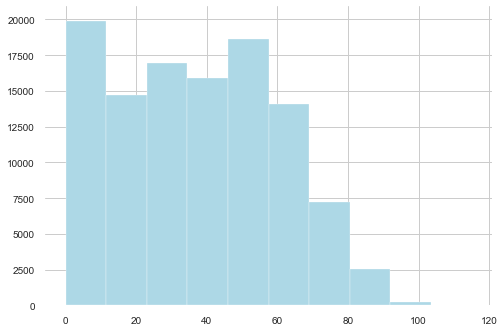

In [18]:
df_clean['Age'].hist(color='lightblue');

Youth people are the most category who are showing up since the old people rare to show up.

### Who is considered to be careful to attend for their appointments Male or Female?


In [19]:
df_GenderAttende= df_clean.groupby('Gender', as_index=False).Attende.count()
df_GenderAttende

,Gender,Attende
0,F,71730
1,M,38597


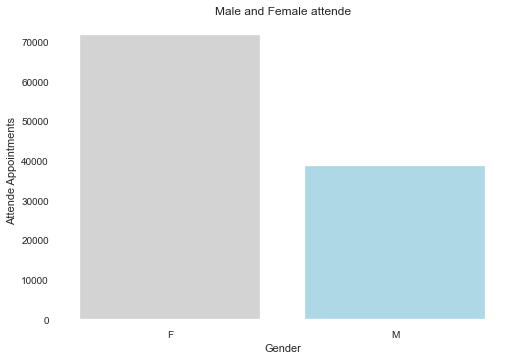

In [20]:
#Who is attende most of the appointment
plt.bar(df_GenderAttende['Gender'],df_GenderAttende['Attende'],color=['lightgray','lightblue'])
plt.title('Male and Female attende')
plt.xlabel('Gender')
plt.ylabel('Attende Appointments');

Females show up more than men and that makes sense since females more than men in the dataset.

### Does the SMS Message is a good reminder?

In [21]:
df_AttendeSMS= df_clean.groupby('Attende', as_index=False).SMS_received.count()
df_AttendeSMS

,Attende,SMS_received
0,No,88049
1,Yes,22278


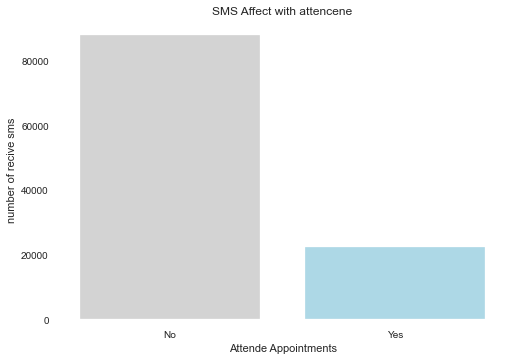

In [22]:
#Is attende effect by sending SMS?
plt.bar(df_AttendeSMS['Attende'],df_AttendeSMS['SMS_received'],color=['lightgray','lightblue'])
plt.title('SMS Affect with attencene')
plt.xlabel('Attende Appointments')
plt.ylabel('number of recive sms');

We see here that surprise that the paints who are showing up did not receive any SMS messages.

### Does the education effect on the people who are come?

In [23]:
df_GenderScholarship = df_clean.groupby('Gender', as_index=False).Scholarship.count()
df_GenderScholarship

,Gender,Scholarship
0,F,71730
1,M,38597


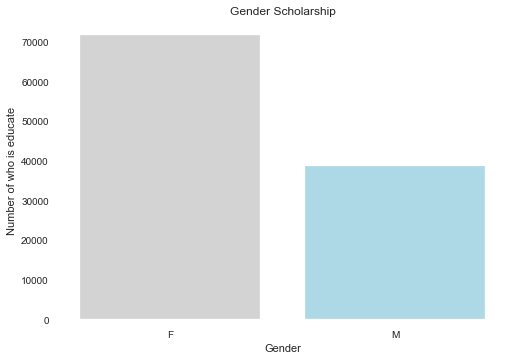

In [24]:
#Is scolarship in male or female effect attend?
plt.bar(df_GenderScholarship['Gender'],df_GenderScholarship['Scholarship'],color=['lightgray','lightblue'])
plt.title('Gender Scholarship')
plt.xlabel('Gender')
plt.ylabel('Number of who is educate');

### Which of the months have the most number of patients attendees?

In [25]:
#in which month have most unateend ...
df_clean['AppointmentDay']=pd.to_datetime(df_clean['AppointmentDay'])
df_clean['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110322   2016-06-07 00:00:00+00:00
110323   2016-06-07 00:00:00+00:00
110324   2016-06-07 00:00:00+00:00
110325   2016-06-07 00:00:00+00:00
110326   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110327, dtype: datetime64[ns, UTC]

In [26]:
df_clean['AppointmentMonth']=df_clean.AppointmentDay.dt.month_name()
df_clean['AppointmentMonth']

0         April
1         April
2         April
3         April
4         April
          ...  
110322     June
110323     June
110324     June
110325     June
110326     June
Name: AppointmentMonth, Length: 110327, dtype: object

In [27]:
df_Months = df_clean.groupby('AppointmentMonth')['Attende'].count()
df_Months

AppointmentMonth
April     3227
June     26406
May      80694
Name: Attende, dtype: int64

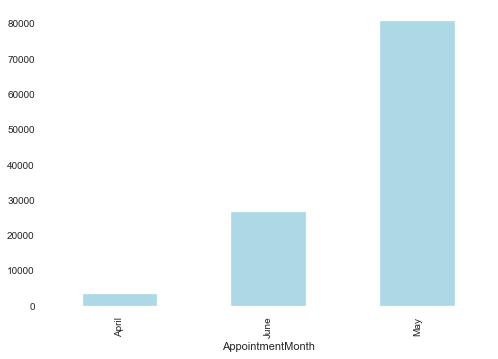

In [28]:
#In which month did the patients show up to their appointments
df_Months.plot(kind='bar',color='lightblue');

### Does Alcohol have any effect on coming or not?

In [29]:
df_Alcoholism= df_clean.groupby('Attende', as_index=False).Alcoholism.count()
df_Alcoholism

,Attende,Alcoholism
0,No,88049
1,Yes,22278


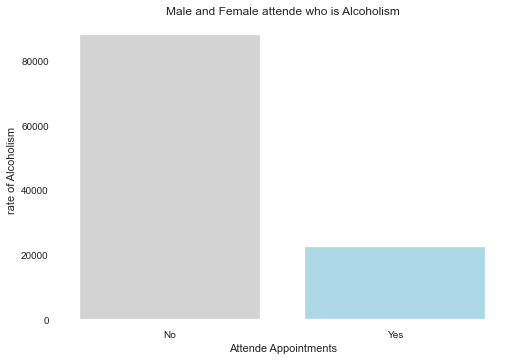

In [30]:
#many patient has alcoholic didn't come to there appointments
plt.bar(df_Alcoholism['Attende'],df_Alcoholism['Alcoholism'],color=['lightgray','lightblue'])
plt.title('Male and Female attende who is Alcoholism')
plt.xlabel('Attende Appointments')
plt.ylabel('rate of Alcoholism');

Alcoholism effect negatively on the paints attendance.

<a id='conclusions'></a>
## Conclusions

> Finally, we can see that there are some reasons affect to the patients in showing up or not to their appointments, the youth and females are the most attended to their appointments, some other factor will affect in the paints like alcohol, the SMS remainder has no impact in Brazilian patients we should search for another method that will remind the patients to their appointments.
<ul>
Resouces:
<li><a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle</a></li>
<li><a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas Documentation</a></li>    
</ul>